# ODE (IVP / BVP)

> How to solve ODE (Ordinary Differential Equation) using scipy
> IVP : Initial Value Problem
> BVP : Boundary Value Problem

In [ ]:
#| default_exp ode

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
from scipy.integrate import solve_ivp

## Reduction to single 1st order ODE

### nth-order ODE
Every n-th order ODE

$$
\frac{d^n f(x)}{dx^n} = \mathcal{F}\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2 f(x)}{dx^2}, \cdots, \frac{d^{n-1} f(x)}{dx^{n-1}} \right)
$$ 

can be expressed in the 1st order ODE form

$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x))
$$

with a state vector $\mathbf{S}(x)$ defined as following:

$$
\mathbf{S}(x) = \begin{bmatrix}
                     f(x) \\
                     \displaystyle\frac{df(x)}{dx} \\
                     \displaystyle\frac{d^2 f(x)}{dx^2} \\
                     \vdots \\
                     \displaystyle\frac{d^{n-1} f(x)}{dx^{n-1}}  \\
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1] \\
                     S[2] \\
                     \vdots \\
                     S[n-1]  \\
                 \end{bmatrix}
$$

Then, the given ODE $\frac{d\mathbf{S}}{dx}$ can be expressed using the elements of $\mathbf{S}(x)$.

$$
\frac{d\mathbf{S}}{dx} = \begin{bmatrix}
                             \displaystyle\frac{df(x)}{dx} \\
                             \displaystyle\frac{d^2 f(x)}{dx^2} \\
                             \displaystyle\frac{d^3 f(x)}{dx^3} \\
                             \vdots \\
                             \displaystyle\frac{d^{n} f(x)}{dx^{n}}  \\
                         \end{bmatrix}
                        = \begin{bmatrix}
                             \displaystyle\frac{df(x)}{dx} \\
                             \displaystyle\frac{d^2 f(x)}{dx^2} \\
                             \displaystyle\frac{d^3 f(x)}{dx^3} \\
                             \vdots \\
                             \mathcal{F}\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2 f(x)}{dx^2}, \cdots, \frac{d^{n-1} f(x)}{dx^{n-1}} \right)  \\
                         \end{bmatrix}
                         = \begin{bmatrix}
                             S[1] \\
                             S[2] \\
                             S[3] \\
                             \vdots \\
                             \mathcal{F}\left(x, S[0], S[1], S[2], \cdots, S[n-1] \right)  \\
                         \end{bmatrix}
$$



### System of 1st order ODEs

Every system of 1st order ODEs

$$
\begin{cases}
  \displaystyle\frac{df_1(x)}{dx} = \mathcal{G_1}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\ 
  \displaystyle\frac{df_2(x)}{dx} = \mathcal{G_2}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\
  \quad\; \vdots \\
  \displaystyle\frac{df_k(x)}{dx} = \mathcal{G_k}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\ 
\end{cases}
$$ 

can be expressed in the 1st order ODE form

$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x))
$$

with a state vector $\mathbf{S}(x)$ defined as following:

$$
\mathbf{S}(x) = \begin{bmatrix}
                     f_1(x) \\
                     f_2(x) \\
                     \vdots \\
                     f_k(x)  \\
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1] \\
                     S[2] \\
                     \vdots \\
                     S[k-1]  \\
                 \end{bmatrix}
$$

Then, the given ODE $\frac{d\mathbf{S}}{dx}$ can be expressed using the elements of $\mathbf{S}(x)$.

$$
\frac{d\mathbf{S}}{dx} = \begin{bmatrix}
                             \displaystyle\frac{df_1(x)}{dx} \\
                             \displaystyle\frac{df_2(x)}{dx} \\
                             \vdots \\
                             \displaystyle\frac{df_k(x)}{dx}  \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                             \mathcal{G_1}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\
                             \mathcal{G_2}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\
                             \vdots \\
                             \mathcal{G_k}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right)  \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                             \mathcal{G_1}\left(x, S[0], S[1], \cdots, S[k-1] \right) \\
                             \mathcal{G_2}\left(x, S[0], S[1], \cdots, S[k-1] \right) \\
                             \vdots \\
                             \mathcal{G_3}\left(x, S[0], S[1], \cdots, S[k-1] \right)  \\
                         \end{bmatrix}
$$

## ODE - IVP(Initial Value Problem)


### How to solve IVP using scipy

```python
from scipy.integrate import solve_ivp

sol = solve_ivp(F, t_span, y0, t_eval=t)
```

### The given problem

- Target `y`
$$
\mathbf{S}(t)
$$

- ODE system `F(t, y)`
$$
\frac{d\mathbf{S}}{dt} = \mathbf{F}(t, \mathbf{S}(t))
$$

- Domain `t_span=[t_0, t_f]`
$$
t \in [t_0, t_f]
$$
    - If the number of points `N` is given, `t = np.linspace(t_span[0], t_span[1], N)`.

    - If the spacing `h` is given, `t = np.arange(t_span[0], t_span[1]+h, h)`. Here, the purpose of `+h` in `t_span[1]+h` is to include the value of `t_span[1]` in the array `t`.


- Initial condition `y0`
$$
\mathbf{S}(t_0)
$$

### Solution

- Target `sol.y`
$$
\mathbf{S}(t)
$$

- Domain `sol.t`
$$
t = [t_0, \cdots, t_f]
$$

### References
- [scipy solve_ivp docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
- [PDF about IVP and BVP in Python](https://acme.byu.edu/0000017c-ccfe-da17-a5fd-cdfeff540000/acmefiles-08-bvp-2021-pdf)
- [Python Programming and Numerical Methods, Chap 22](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html)
- [Blog post about odeint vs solve_ivp](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/)

## IVP Example1

$$
\begin{cases}
  y''+ 3y = \sin t \\ 
  t \in [0, 5] \\
  y(0) = -\frac{\pi}{2} \\
  y'(0) = \pi \\
\end{cases}
$$ 

### Rewrite ODE using $\mathbf{S}(t)$

- Target `y`
$$
\mathbf{S}(t) = \begin{bmatrix}
                    y(t) \\
                    y'(t) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    S[0] \\
                    S[1] \\
                \end{bmatrix}
$$

- ODE system `F(t, y)`
$$
\frac{d\mathbf{S}}{dt} = \mathbf{F}(t, \mathbf{S}(t)) 
                       = \begin{bmatrix}
                            y'(t) \\
                            y''(t) \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                            y' \\
                            -3y + \sin t \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                            S[1] \\
                            -3S[0] + \sin t \\
                         \end{bmatrix}
$$

- Domain

```python
t_span = [0, 5]
h = 0.1 # hyperparameter
t = np.arange(t_span[0], t_span[1]+h, h)
```

- Initial condition `y0`
$$
\mathbf{S}(0) = \begin{bmatrix}
                    y(0) \\
                    y'(0) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    -\frac{\pi}{2} \\
                    \pi \\
                \end{bmatrix}
$$


In [ ]:
#| exporti
#| hide
def F(t, y):
    return [y[1], -3*y[0] + np.sin(t)]

t_span = [0, 5]
h = 0.1
t = np.arange(t_span[0], t_span[1]+h, h)

y0 = [-np.pi/2, np.pi]

We can solve this problem from the above information.

In [ ]:
sol = solve_ivp(F, t_span, y0, t_eval=t)

Solution info

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  4.900e+00  5.000e+00]
        y: [[-1.571e+00 -1.235e+00 ...  1.669e+00  1.710e+00]
            [ 3.142e+00  3.568e+00 ...  7.144e-01  1.089e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

Domain $t$

In [ ]:
sol.t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

Target state vector $\mathbf{S}(t)$

In [ ]:
sol.y

array([[-1.57079633, -1.23453277, -0.86030514, -0.45843048, -0.03984597,
         0.38403622,  0.80132899,  1.20010117,  1.56956933,  1.89899569,
         2.17913795,  2.40237059,  2.56269013,  2.65611774,  2.6797985 ,
         2.63269535,  2.5161626 ,  2.33394593,  2.09215279,  1.79786469,
         1.45927277,  1.08592922,  0.68838898,  0.27820968, -0.13264009,
        -0.53292218, -0.91109765, -1.256714  , -1.56047376, -1.81423449,
        -2.01153094, -2.14738851, -2.21825989, -2.22290454, -2.16239147,
        -2.04004441, -1.8604542 , -1.62961589, -1.35504951, -1.04569361,
        -0.71190521, -0.36459551, -0.01451474,  0.32717482,  0.64994   ,
         0.94388468,  1.1997787 ,  1.40987673,  1.56773208,  1.66861058,
         1.70977222],
       [ 3.14159265,  3.56848512,  3.89917004,  4.12291412,  4.23214869,
         4.2232754 ,  4.09666617,  3.85641458,  3.50881107,  3.06297723,
         2.53105399,  1.92817178,  1.2724329 ,  0.58252342, -0.12206293,
        -0.82113985, -1.49509

Draw the solution

In [ ]:
import matplotlib.pyplot as plt

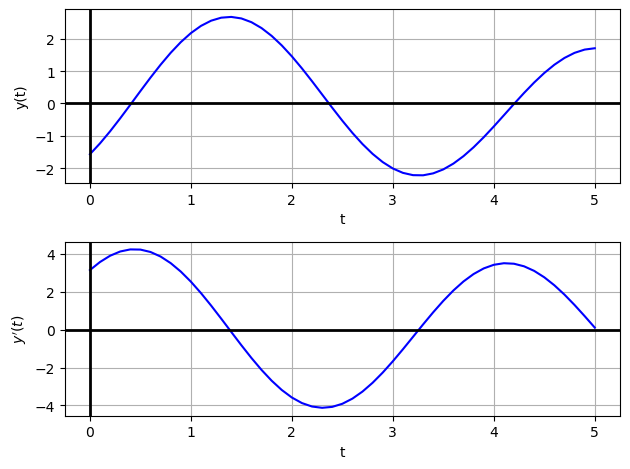

In [ ]:
#| code-fold:true
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(sol.t, sol.y[0], color='blue') # y(t)
axes[0].axhline(0, color='k', linewidth=2) # x-axis
axes[0].axvline(0, color='k', linewidth=2) # y-axis
axes[0].grid(True)
axes[0].set_xlabel('t')
axes[0].set_ylabel('y(t)')

axes[1].plot(sol.t, sol.y[1], color='blue') # y'(t)
axes[1].axhline(0, color='k', linewidth=2) # x-axis
axes[1].axvline(0, color='k', linewidth=2) # y-axis
axes[1].grid(True)
axes[1].set_xlabel('t')
axes[1].set_ylabel(r"$y'(t)$")

plt.tight_layout()

If `dense_output = True`, we get a solution [**function**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.OdeSolution.html#scipy.integrate.OdeSolution) as the sol.sol object.

In [ ]:
sol = solve_ivp(F, t_span, y0, t_eval=t, dense_output=True)

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  4.900e+00  5.000e+00]
        y: [[-1.571e+00 -1.235e+00 ...  1.669e+00  1.710e+00]
            [ 3.142e+00  3.568e+00 ...  7.144e-01  1.089e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object>
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

In [ ]:
sol.sol

<scipy.integrate._ivp.common.OdeSolution>

Then we can calculate values at any point using this function.

So, it can be also used for smooth plotting.

In [ ]:
t_eval = np.linspace(-1, 6, 1000)

In [ ]:
y_eval = sol.sol(t_eval)

In [ ]:
y_eval.shape

(2, 1000)

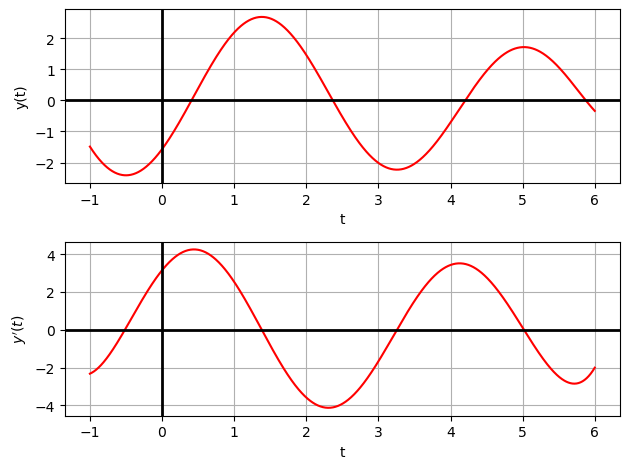

In [ ]:
#| code-fold:true
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(t_eval, y_eval[0], color='red') # y(t) eval
axes[0].axhline(0, color='k', linewidth=2) # x-axis
axes[0].axvline(0, color='k', linewidth=2) # y-axis
axes[0].grid(True)
axes[0].set_xlabel('t')
axes[0].set_ylabel('y(t)')

axes[1].plot(t_eval, y_eval[1], color='red') # y'(t) eval
axes[1].axhline(0, color='k', linewidth=2) # x-axis
axes[1].axvline(0, color='k', linewidth=2) # y-axis
axes[1].grid(True)
axes[1].set_xlabel('t')
axes[1].set_ylabel(r"$y'(t)$")

plt.tight_layout()